<a href="https://colab.research.google.com/github/RodLA/sa_twitter_president_peru/blob/main/AS_(SVC%2CMNB%2CBNB%2CKNC%2CRL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter sentiment analysis**
The performance of the following classifiers will be evaluated: Naive Bayes, SVM, Logistic Regression, k-nearest neighbors.
The following metrics will be used: accuracy, F1 Score

# **Import dependencies**

In [105]:
import re
import numpy as np
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# **Data load**

In [106]:
df = pd.read_excel('as_beto.xlsx')

# **visualization of data according to polarity**

In [ ]:
ax = df.groupby('target').count().plot(kind='bar', title='Data Distribution',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
text, sentiment = list(df['text']), list(df['target'])

# **Data preprocessing**

In [108]:
data=df[['text','target']]

In [ ]:
# change from 0 (neutral) to 4. since it will not be used
data['target'] = data['target'].replace(0,4)
# change from -1 (negative) to 0
data['target'] = data['target'].replace(-1,0)

In [110]:
dataset = data[data['target'].isin([1, 0])]

In [111]:
#  Definition set containing all stop words in Spanish.
stopwordlist = ['un', 'una','que' ,'unos', 'unas', 'el','y','que', 'la','de', 'los', 'las', 'lo', 'al', 'del', 'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante',
                'en', 'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so', 'sobre', 'tras', 'si', 'no', 'ni', 'pero', 'sino', 'más', 'menos',
                'solo', 'sólo', 'también', 'tampoco', 'aunque', 'así', 'debe', 'debería', 'puede', 'podría', 'quizás', 'tal', 'vez', 'como', 'cuando', 'donde',
                'porque', 'siempre', 'nunca', 'jamás', 'igual', 'mismo', 'otro', 'otros', 'otra', 'otras', 'muy', 'mucho', 'poco', 'pocos', 'poca',
                'pocas', 'todo', 'todos', 'toda', 'todas', 'ningún', 'ninguna', 'ningunos', 'ningunas', 'cual', 'cuales', 'qué', 'quien', 'quienes', 'cómo', 'cuánto',
                'cuánta', 'cuántos', 'cuántas', 'qué', 'cuál', 'cuáles', 'éste', 'ésta', 'éstos', 'éstas', 'eso', 'aquello', 'aquí', 'ahí', 'allí', 'cerca', 'lejos',
                'fuera', 'dentro', 'encima', 'debajo', 'abajo', 'arriba', 'medio', 'fuera', 'primero', 'segundo', 'tercero', 'cuarto', 'quinto', 'sexto', 'séptimo',
                'octavo', 'noveno', 'décimo', 'anteayer', 'ayer', 'hoy', 'mañana', 'tarde', 'noche', 'vez', 'veces', 'siempre', 'nunca', 'jamás', 'todavía', 'ya',
                'aun', 'aún', 'quizá', 'tal', 'vez', 'cualquier', 'ninguno', 'todo', 'nadie', 'alguien', 'varios', 'varias', 'mucho', 'poco', 'pocos', 'muchos',
                'muchas', 'bastante', 'demasiado', 'menos', 'más', 'aún', 'incluso', 'solamente', 'únicamente', 'no', 'tampoco', 'sino', 'sí', 'claro', 'por', 'favor',
                'vale', 'hola', 'adiós', 'chao', 'gracias', 'hasta', 'luego', 'si', 'no', 'tal', 'vez', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
                'l', 'm','a', 'actualmente', 'acuerdo', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'al', 'algo', 'algún', 'algunas', 'algunos', 'allí', 'alrededor',
                'ambos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'así', 'aseguró', 'aun', 'aunque', 'ayer',
                'bajo', 'buen', 'buenas', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'como', 'cómo', 'con',
                'conocer', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'contigo', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando',
                'cuanta', 'cuantas', 'cuanto', 'cuantos', 'cuenta', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'deben', 'debido', 'decir', 'dejó', 'del', 'delante',
                'demás', 'demasiado', 'dentro', 'deprisa', 'desde', 'después', 'detras', 'dia', 'días', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes',
                'dijeron', 'dijo', 'dio', 'donde', 'dos', 'durante', 'e', 'ejemplo', 'el', 'él', 'ella', 'ellas', 'ello', 'ellos', 'embargo', 'en', 'encuentra',
                'entonces', 'entre', 'era', 'eran', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'está', 'estaba', 'estado', 'estados', 'están', 'estar', 'estas',
                'este', 'esto', 'estos', 'estoy', 'etc', 'ésta', 'éstas', 'este', 'éstos', 'ex', 'excepto', 'existe', 'existen', 'explicó', 'expresó', 'fin', 'fue',
                'fuera', 'fueron', 'gran', 'grandes', 'ha', 'había', 'habían', 'haber', 'habrá', 'hace', 'hacen', 'hacer', 'hacia', 'haciendo', 'hago', 'han', 'hasta',
                'hay', 'haya', 'he', 'hecho', 'hemos', 'hicieron', 'hizo', 'hora', 'horas', 'hoy', 'hubo', 'igual', 'incluso', 'indicó', 'informó', 'junto', 'la',
                'lado', 'las', 'le', 'les', 'llegó', 'lleva', 'llevar', 'lo', 'los', 'luego','q','se','su','tu','o','xq','nos','x','jajaja','te',"jajajaja","jajajajajaja","excelente",
                "nada","jajajajaja","jajajajajajaja","esta","va","pasa","\n"]

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))

In [ ]:
# Get tokenization of tweet text
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

In [ ]:
import nltk
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text']

In [ ]:
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

In [116]:
data = data[data['target'].isin([1, 0])]

In [117]:
max_rows = 8000
data = pd.concat([
    data[data['target'] == 1].head(max_rows),
    data[data['target'] == 0].head(max_rows)
])

In [118]:
# Separation of input function and label
X=data.text
y=data.target

In [ ]:
data_negative = dataset.loc[dataset['target'] == 0, 'text'].tolist()
plt.figure(figsize = (20,20))

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(' '.join([' '.join(text) for text in data_negative]))

plt.imshow(wc)

# **Split our training and test data**

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =26105111)

# **Dataset transformation using TF-IDF Vectorizer**

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

In [122]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

# **Functions for model evaluation**


In [123]:
from sklearn.metrics import roc_curve, auc

def curva_ROC_AUC(y_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)

  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC CURVE')
  plt.legend(loc="lower right")
  plt.show()

In [124]:
def evaluate_model(model):
  y_pred = model.predict(X_test)

  # Print the evaluation metrics for the data set.
  print("Metrics")
  print(classification_report(y_test, y_pred))

  # Compute and plot the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

  curva_ROC_AUC(y_pred)

# **Execution of the models**
1. Multinomial Naive Bayes Classifier
2. Bernoulli Naive Bayes Classifier
3. Linear Support Vector Classification
4. Logistic Regression
5. K Neighbors Classifier

**1. Multinomial Naive Bayes Clasificador**



Metrics
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1095
           1       1.00      0.05      0.09        63

    accuracy                           0.95      1158
   macro avg       0.97      0.52      0.53      1158
weighted avg       0.95      0.95      0.93      1158



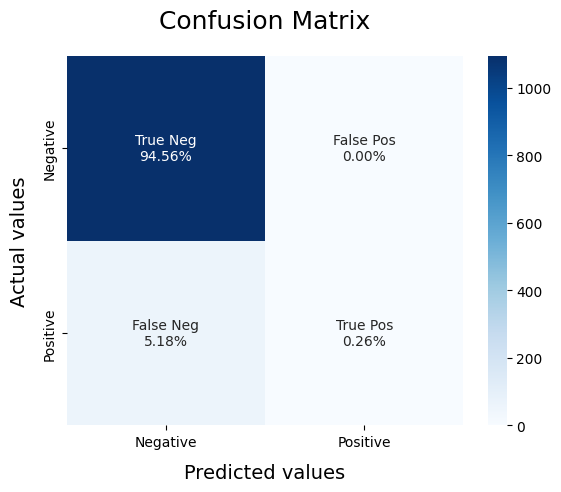

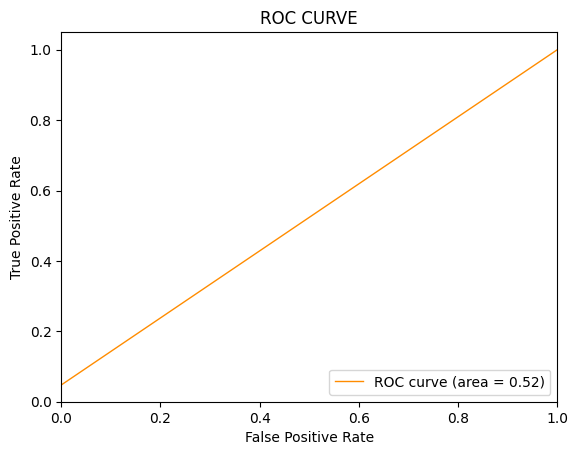

In [130]:
MNBmodel = MultinomialNB()
MNBmodel.fit(X_train, y_train)
evaluate_model(MNBmodel)

**2. Bernoulli Naive Bayes Clasificador**

Metrics
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1095
           1       0.00      0.00      0.00        63

    accuracy                           0.95      1158
   macro avg       0.47      0.50      0.49      1158
weighted avg       0.89      0.95      0.92      1158



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


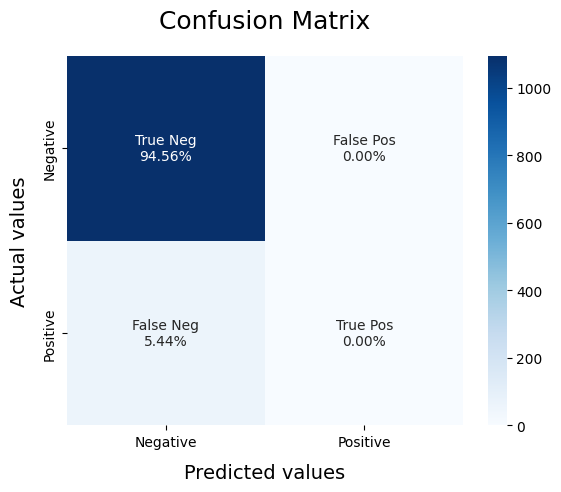

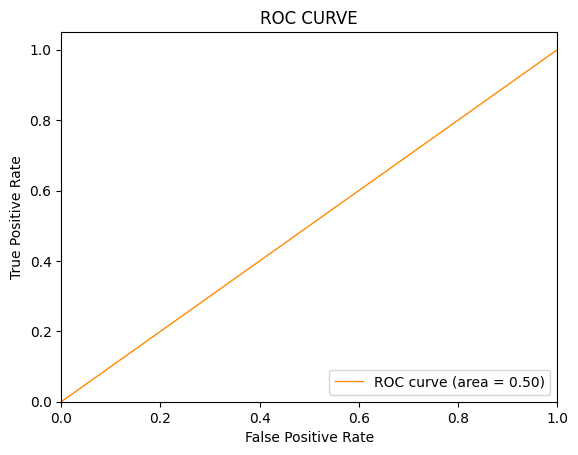

In [131]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
evaluate_model(BNBmodel)

**3. Linear Support Vector Classification**

Metrics
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1095
           1       0.92      0.35      0.51        63

    accuracy                           0.96      1158
   macro avg       0.94      0.67      0.74      1158
weighted avg       0.96      0.96      0.95      1158



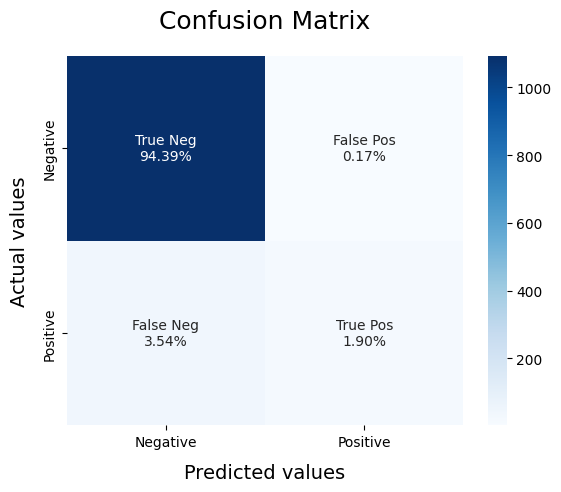

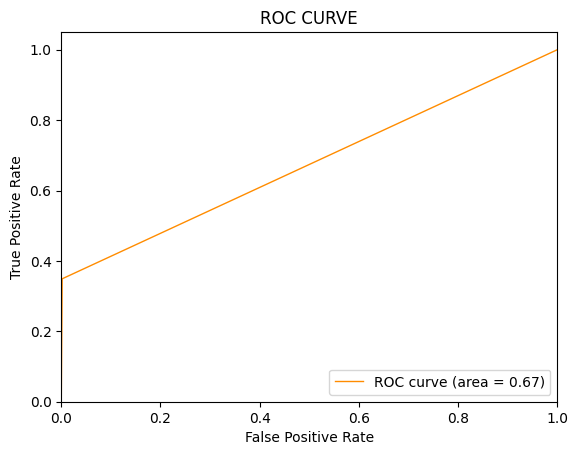

In [132]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
evaluate_model(SVCmodel)

**4. Logistic Regression**

Metrics
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1095
           1       1.00      0.22      0.36        63

    accuracy                           0.96      1158
   macro avg       0.98      0.61      0.67      1158
weighted avg       0.96      0.96      0.94      1158



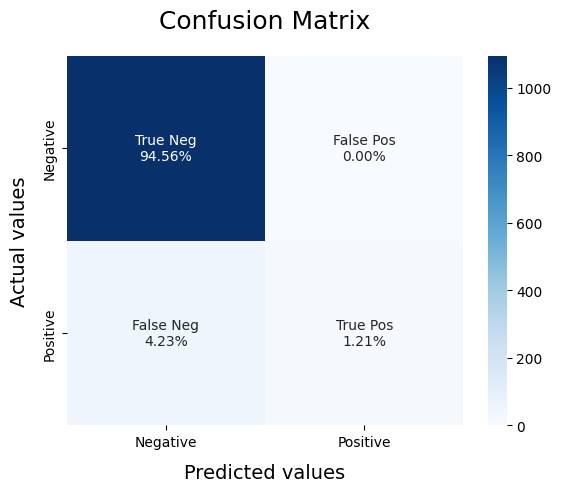

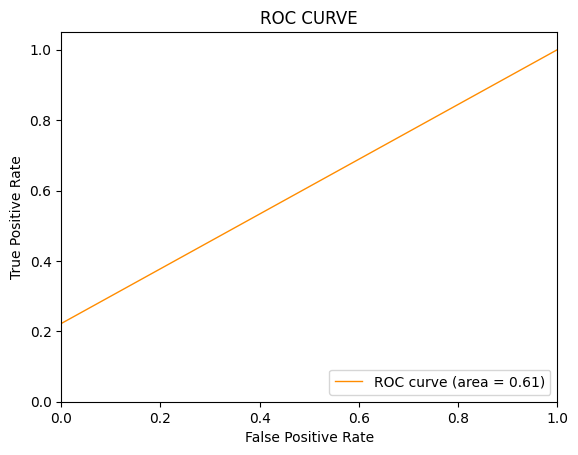

In [133]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
evaluate_model(LRmodel)

**5. K Neighbors Classifier**

Metrics
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1095
           1       0.64      0.43      0.51        63

    accuracy                           0.96      1158
   macro avg       0.81      0.71      0.75      1158
weighted avg       0.95      0.96      0.95      1158



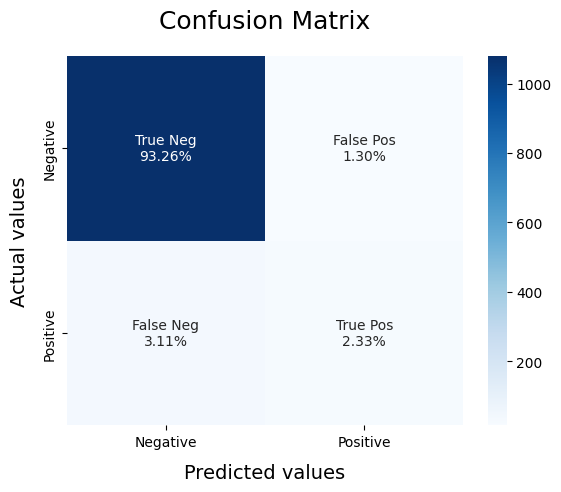

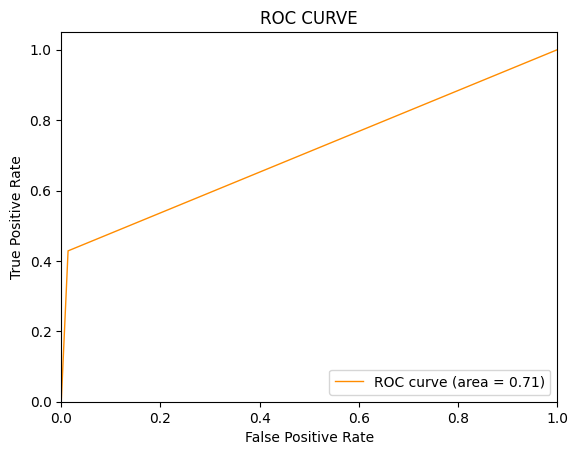

In [129]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train, y_train)
evaluate_model(KNNmodel)